

1.   Carga de datos desde DuckDB.
2.   Gráfico de barras: Total de accidentes por año.
3.   Gráfico de líneas: Comparativa de lesionados y fallecidos por año.


Tables in the database:
                  name
0    accidents_by_year
1   my_first_dbt_model
2  my_second_dbt_model
3        stg_accidents


<ipython-input-1-2825357118>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="accident_year",y="total_accidents",palette="Blues_d")


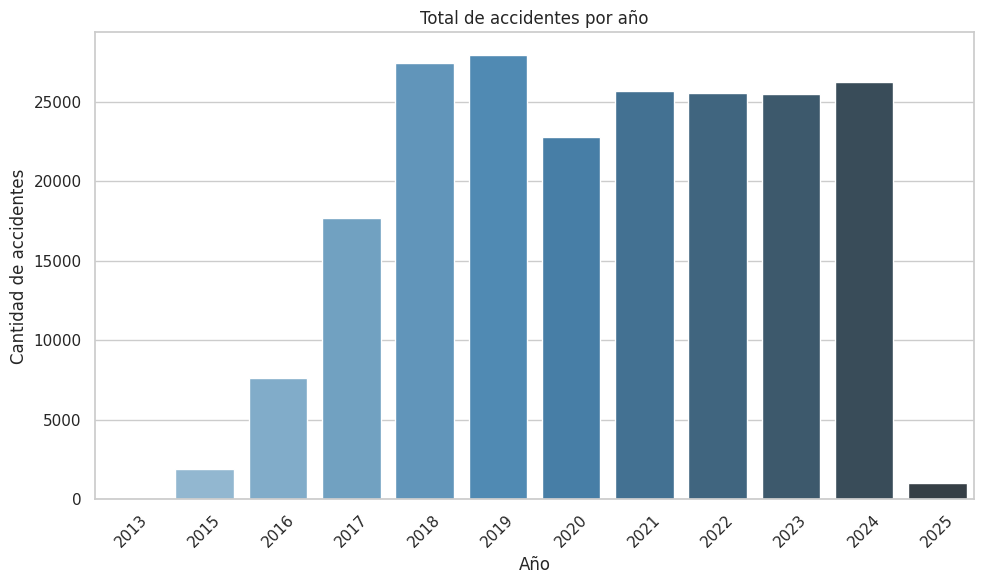

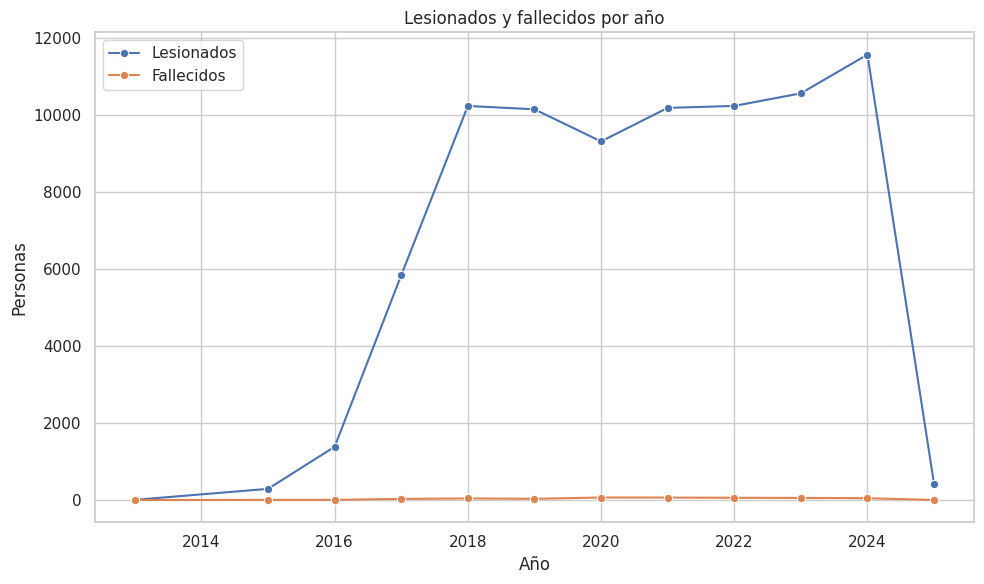

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb
# Leer modelo desde DuckDB
con=duckdb.connect('traffic.duckdb')


print("Tables in the database:")
print(con.execute("SHOW TABLES;").fetchdf())

df=con.execute("SELECT * FROM accidents_by_year").fetchdf()
df.head()
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="accident_year",y="total_accidents",palette="Blues_d")
plt.title("Total de accidentes por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de accidentes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=df,x="accident_year",y="total_injuries",label="Lesionados",marker="o")
sns.lineplot(data=df,x="accident_year",y="total_fatalities",label="Fallecidos",marker="o")
plt.title("Lesionados y fallecidos por año")
plt.xlabel("Año")
plt.ylabel("Personas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()